<a href="https://colab.research.google.com/github/DhanyaSajan/MINI-PROJECT/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ipython-autotime
%load_ext autotime

time: 241 µs (started: 2021-06-28 12:32:51 +00:00)


In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [37]:
from bing_image_downloader import downloader
downloader.download("pretty sunflowers",limit=30,output_dir='images',adult_filter_off=True)


[%] Downloading Images to /content/images/pretty sunflowers


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/69/30/e0/6930e0d5364f2eead9591771a7515665.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://pixfeeds.com/images/flowers/sunflowers/1280-506587098-beautiful-sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/d6/65/0d/d6650dfbe09a374d2a6f4fdca2f8a9f6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i0.wp.com/howlifestyles.com/wp-content/uploads/2020/06/Sunflowers_20200510.jpg?fit=800%2C1000&amp;ssl=1
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/84/07/19/84071927dcb8c441b0d8634bfaf86c31--sunflower-fields-sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/24/91/34/24913484791991a13f6b644ab1366f3a--the-sunflower-kansas.jpg
[%] File Downloaded !

[%] Downloading 

In [77]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES=['pretty sunflowers','rugby ball','cone icecream']

for category in CATEGORIES:
    class_num= CATEGORIES.index(category)
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array=imread(os.path.join(path,img))
     # print(img_array.shape)
      #plt.imshow(img_array)
      img_resized=resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images= np.array(images)

time: 34.8 s (started: 2021-06-28 18:53:04 +00:00)


In [73]:
flat_data[0]


array([0.66666667, 0.83137255, 0.99607843, ..., 0.69521569, 0.76862745,
       0.        ])

time: 4.05 ms (started: 2021-06-28 18:24:08 +00:00)


In [74]:
150*150

22500

time: 6.68 ms (started: 2021-06-28 18:24:13 +00:00)


In [75]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.2 ms (started: 2021-06-28 18:24:16 +00:00)


<BarContainer object of 3 artists>

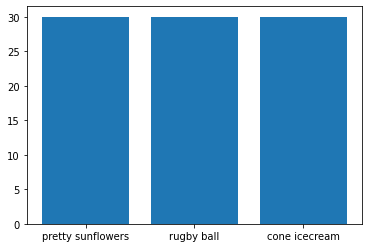

time: 146 ms (started: 2021-06-28 18:24:21 +00:00)


In [76]:
unique,count= np.unique(target, return_counts=True)
plt.bar(CATEGORIES,count)

In [78]:
#Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target, test_size=0.3,random_state=109)

time: 18.7 ms (started: 2021-06-28 18:53:51 +00:00)


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},                 
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}   
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 44s (started: 2021-06-28 18:54:34 +00:00)


In [81]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 0, 1])

time: 177 ms (started: 2021-06-28 18:57:53 +00:00)


In [82]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.63 ms (started: 2021-06-28 18:58:00 +00:00)


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 1.38 ms (started: 2021-06-28 18:58:03 +00:00)


In [84]:
accuracy_score(y_pred,y_test)

0.8148148148148148

time: 6.81 ms (started: 2021-06-28 18:58:07 +00:00)


In [85]:
confusion_matrix(y_pred, y_test)

array([[8, 0, 0],
       [0, 8, 2],
       [0, 3, 6]])

time: 7.05 ms (started: 2021-06-28 18:58:11 +00:00)


In [86]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 44.4 ms (started: 2021-06-28 18:58:16 +00:00)


In [87]:
model=pickle.load(open('img_model.p','rb'))

time: 22.2 ms (started: 2021-06-28 18:58:18 +00:00)


Enter your URLhttps://www.renderhub.com/3dshop/choco-icecream-cone/choco-icecream-cone-01.jpg
(2048, 2048, 3)
PREDICTED OUTPUT:cone icecream


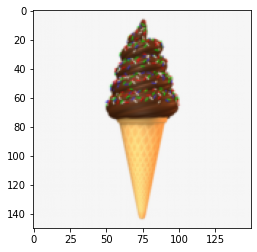

time: 8.64 s (started: 2021-06-28 19:04:45 +00:00)


In [91]:
flat_data = []
url = input('Enter your URL')
img= imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [92]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

time: 5.17 s (started: 2021-06-28 19:05:03 +00:00)
